## EDA on Loan Prediction data

In [1]:
#importing neccessary libraries
import pandas as pd 
import numpy as np                     
import seaborn as sns                   
import matplotlib.pyplot as plt        
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Lets load Data set file
train=pd.read_csv("train_lp.csv") 

In [3]:
#view insight of dataset
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#train_original=train.copy() 

In [5]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
train.shape

(614, 13)

In [7]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Normalize can be set to True to print proportions instead of number train

In [8]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

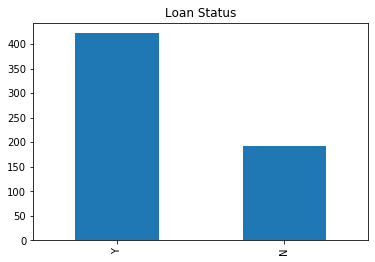

In [9]:
train['Loan_Status'].value_counts().plot.bar(title='Loan Status')
plt.show()

## Independent Variable (Categorical)

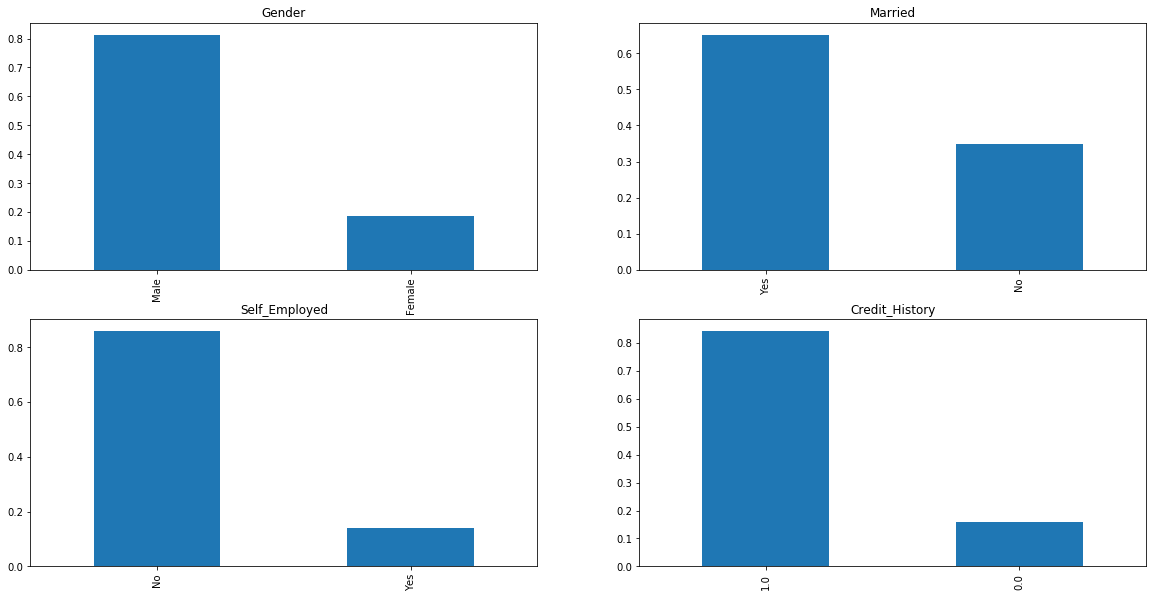

In [10]:
import matplotlib.pyplot as plt 
plt.figure(1) 

plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 

plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 

plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 

plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 

plt.show()

Observations:

80% applicants in the dataset are male.

Around 65% of the applicants in the dataset are married.

Around 15% applicants in the dataset are self employed.

Around 85% applicants have repaid their debts.

## Independent Variable (Ordinal)

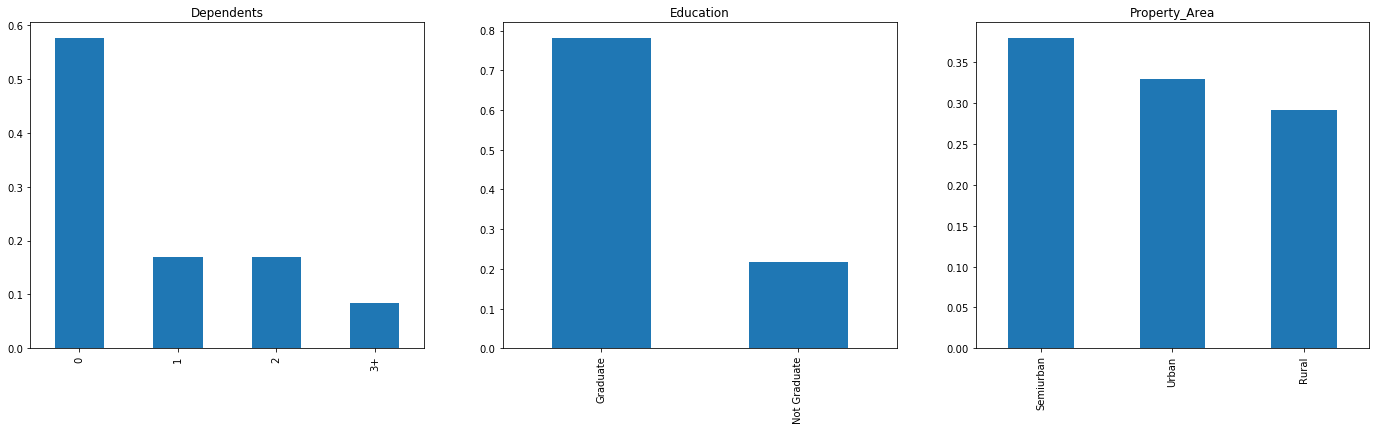

In [11]:
plt.figure(1) 

plt.subplot(131) 
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 

plt.subplot(132) 
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 

plt.show()

Observations:

Most of the applicants don’t have any dependents.

Around 80% of the applicants are Graduate.

Most of the applicants are from Semi-urban area.

## Independent Variable (Numerical)

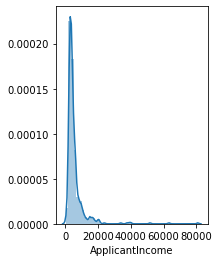

In [12]:
import seaborn as sns  
plt.figure(1) 

plt.subplot(121)
sns.distplot(train['ApplicantIncome']); 

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. 

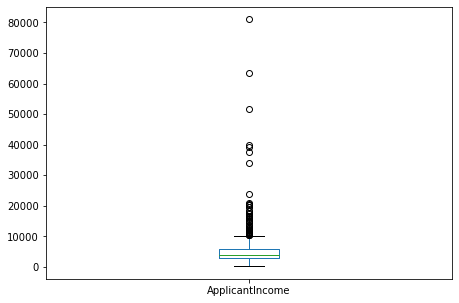

In [13]:
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()


The boxplot confirms the presence of a lot of 
outliers/extreme values. 
  This can be attributed to the income disparity 
in the society. 

Let us segregate them by Education:

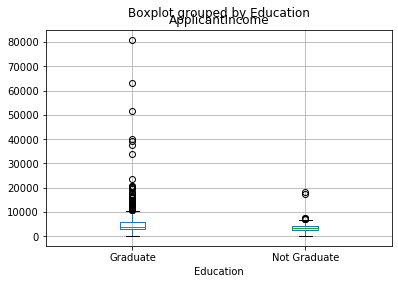

In [14]:
train.boxplot(column='ApplicantIncome', by = 'Education')
plt.show()

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

Coapplicant income distribution.

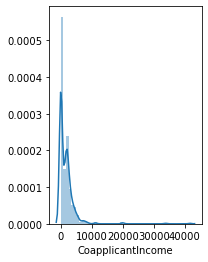

In [15]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['CoapplicantIncome']); 

Majority of coapplicant’s income ranges from 0 to 5000.

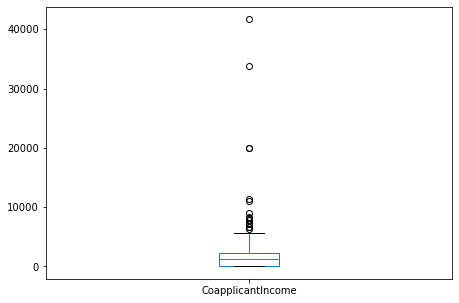

In [16]:
plt.subplot(122) 
train['CoapplicantIncome'].plot.box(figsize=(16,5)) 

lot of outliers in the coapplicant income and it is not normally distributed.

distribution of LoanAmount variable

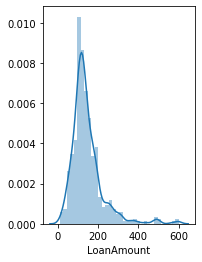

In [17]:
plt.figure(1)

plt.subplot(121) 
df=train.dropna() 
sns.distplot(df['LoanAmount']); 

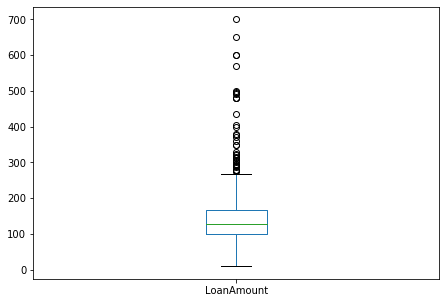

In [18]:
plt.subplot(122) 
train['LoanAmount'].plot.box(figsize=(16,5)) 

lot of outliers in this variable and the distribution is fairly normal

 Study how well each feature correlate with Loan Status.
 
 Categorical Independent Variable vs Target Variable

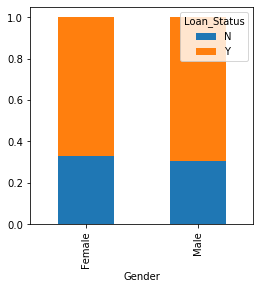

In [19]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

It can be inferred that the proportion of male and female applicants is
more or less same for both approved and unapproved loans.

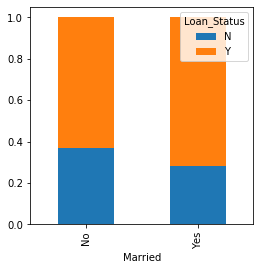

In [20]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])

Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 

Education=pd.crosstab(train['Education'],train['Loan_Status']) 

Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

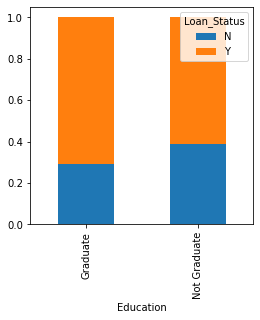

In [21]:
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

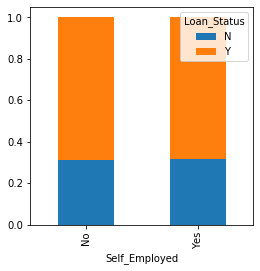

In [22]:
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

observations :

Proportion of married applicants is higher for the approved loans.

Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.

There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

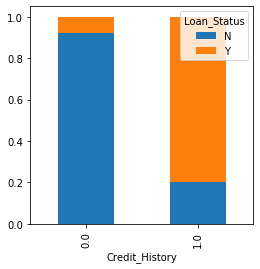

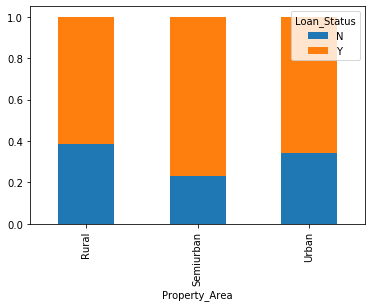

In [23]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)


It seems people with credit history as 1 are more likely to get their loans approved.

Proportion of loans getting approved in semiurban area is higher as compared to that
in rural or urban areas.

## Numerical Independent Variable vs Target Variable

find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.


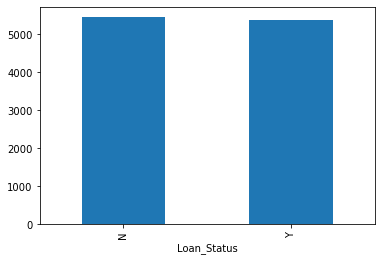

In [24]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

look at the correlation between all the numerical variables. 

Use the heat map to visualize the correlation. 

Heatmaps visualize data through variations in coloring. 

The variables with darker color means their correlation is more.

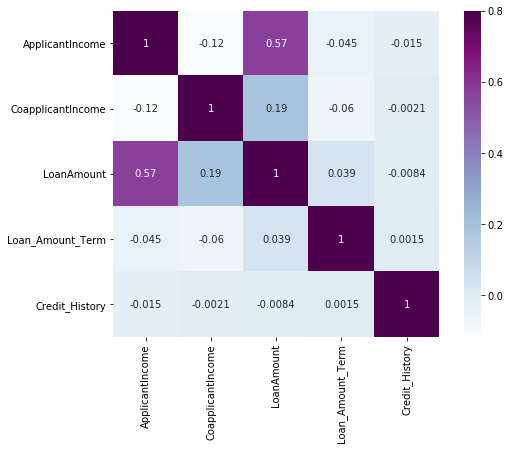

In [25]:

matrix = train.corr()
plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu",annot=True);

Most correlated variables are (ApplicantIncome - LoanAmount) 
and (Credit_History - Loan_Status). 
LoanAmount is also correlated with CoapplicantIncome.


# Data Preprocessing 

## Missing value imputation

In [26]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features.

Methods to fill the missing values:
    
For numerical variables: imputation using mean or median

For categorical variables: imputation using mode

In [27]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 

train['Married'].fillna(train['Married'].mode()[0], inplace=True)

train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 

train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)

train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [28]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

find a way to fill the missing values in Loan_Amount_Term. 

look at the value count of the Loan amount term variable.

In [29]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in loan amount term variable, the value of 360 is repeating the most. 

So we will replace the missing values in this variable using the mode of this variable.

In [30]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

Now LoanAmount variable. 
As it is a numerical variable, we can use mean or median to impute the missing values. 

see that loan amount have outliers so the mean will not be the proper 
approach as it is highly affected by the presence of outliers

In [31]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [32]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. 

One way to remove the skewness is by doing the log transformation. 

As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. 

So, we get a distribution similar to normal distribution.

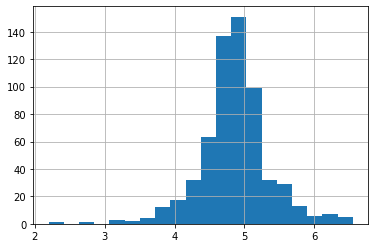

In [33]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20) 

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. 

In [34]:
train=train.drop('Loan_ID',axis=1) 

In [35]:
train=pd.get_dummies(train,drop_first=True) 

In [36]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,4.852030,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,4.948760,1,0,0,0,0,0,0,0,1,1


Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:

Total Income - combine the Applicant Income and Coapplicant Income. 
If the total income is high, chances of loan approval might also be high.

EMI - EMI is the monthly amount to be paid by the applicant to repay the loan. 
Idea behind making this variable is that people who have high EMI’s might find it 
difficult to pay back the loan. 
We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.

Balance Income - This is the income left after the EMI has been paid. 
Idea behind creating this variable is that if this value is high, 
the chances are high that a person will repay the loan and hence increasing the chances 
of loan approval.



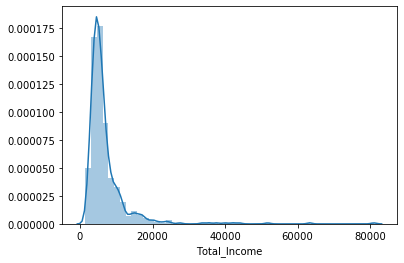

In [37]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome'] 


sns.distplot(train['Total_Income']);

the distribution is right skewed. So, let’s take the log transformation to make the distribution normal.

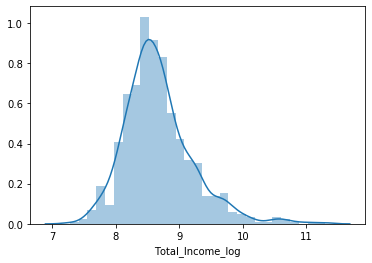

In [38]:

train['Total_Income_log'] = np.log(train['Total_Income']) 
sns.distplot(train['Total_Income_log']); 


In [39]:
# create the EMI feature now.

train['EMI']=train['LoanAmount']/train['Loan_Amount_Term'] 


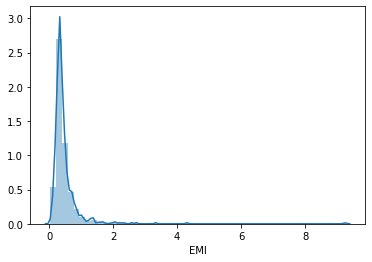

In [40]:
sns.distplot(train['EMI']);

Let us create Balance Income feature now and check its distribution.

Multiply with 1000 to make the units equal 
test['Balance Income']=test['Total_Income']-(test['EMI']*1000)

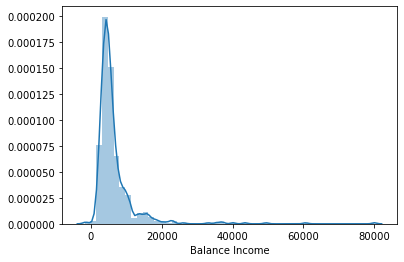

In [41]:
train['Balance Income']=train['Total_Income']-(train['EMI']*1000) 
sns.distplot(train['Balance Income']);

drop the variables which we used to create these new features. 

Because, the correlation between those old features and these new features will be very high and logistic regression assumes that the variables are not highly correlated. 

We also wants to remove the noise from the dataset, so 
removing correlated features will help in reducing the noise too.

In [42]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 

In [43]:
train.shape

(614, 16)

In [44]:
train.head()

,Credit_History,LoanAmount_log,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,Total_Income,Total_Income_log,EMI,Balance Income
0,1.0,4.852030,1,0,0,0,0,0,0,0,1,1,5849.0,8.674026,0.355556,5493.444444
1,1.0,4.852030,1,1,1,0,0,0,0,0,0,0,6091.0,8.714568,0.355556,5735.444444
2,1.0,4.189655,1,1,0,0,0,0,1,0,1,1,3000.0,8.006368,0.183333,2816.666667
3,1.0,4.787492,1,1,0,0,0,1,0,0,1,1,4941.0,8.505323,0.333333,4607.666667
4,1.0,4.948760,1,0,0,0,0,0,0,0,1,1,6000.0,8.699515,0.391667,5608.333333


In [45]:
train.columns

Index(['Credit_History', 'LoanAmount_log', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_Y',
       'Total_Income', 'Total_Income_log', 'EMI', 'Balance Income'],
      dtype='object')

In [46]:
X = train.drop('Loan_Status_Y',1) 
y = train.Loan_Status_Y

In [47]:
print(X.shape);print(y.shape)
X.head()

(614, 15)
(614,)


,Credit_History,LoanAmount_log,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance Income
0,1.0,4.852030,1,0,0,0,0,0,0,0,1,5849.0,8.674026,0.355556,5493.444444
1,1.0,4.852030,1,1,1,0,0,0,0,0,0,6091.0,8.714568,0.355556,5735.444444
2,1.0,4.189655,1,1,0,0,0,0,1,0,1,3000.0,8.006368,0.183333,2816.666667
3,1.0,4.787492,1,1,0,0,0,1,0,0,1,4941.0,8.505323,0.333333,4607.666667
4,1.0,4.948760,1,0,0,0,0,0,0,0,1,6000.0,8.699515,0.391667,5608.333333


# LogisticRegression

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [49]:
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [50]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
predictions = logreg.predict(x_test)

In [52]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1], dtype=uint8)

In [53]:
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(predictions,y_test)*100,'%')

Accuracy Score: 78.04878048780488 %


In [54]:
confusion_matrix(y_test, predictions)

array([[16, 24],
       [ 3, 80]], dtype=int64)

In [55]:
precision_score(y_test, predictions)

0.7692307692307693

In [56]:
recall_score(y_test, predictions)

0.963855421686747

In [57]:
f1_score(y_test, predictions)

0.8556149732620322

In [58]:
y_pred_prob = logreg.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

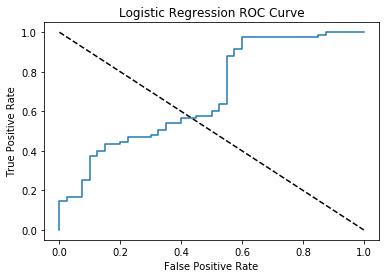

In [59]:
plt.plot([0, 1], [1, 0], 'k--')
plt.plot(fpr, tpr, label='Logitic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

# DecisionTreeClassifier

# KNeighborsClassifier

In [60]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
KNNC = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
KNNC.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [61]:
y_predict = KNNC.predict(x_test)

In [62]:
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_predict,y_test)*100,'%')

Accuracy Score: 65.04065040650406 %


# Naive Bayes model

In [63]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

In [64]:
# Train the model using the training sets
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [65]:
y_predict = model.predict(x_test)

In [66]:
print("Accuracy Score:",accuracy_score(y_predict,y_test)*100,'%')

Accuracy Score: 79.67479674796748 %


# svm

In [67]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [68]:
y_pred = svclassifier.predict(x_test)

In [69]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 7 33]
 [ 1 82]]
              precision    recall  f1-score   support

           0       0.88      0.17      0.29        40
           1       0.71      0.99      0.83        83

    accuracy                           0.72       123
   macro avg       0.79      0.58      0.56       123
weighted avg       0.77      0.72      0.65       123



In [70]:
print("Accuracy Score:",accuracy_score(y_predict,y_test)*100,'%')

Accuracy Score: 79.67479674796748 %


# Conclusion

Gaussian Naive Bayes model and SVC both gives higher accuracy i.e 79.67%